# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [17]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'SP500.csv'
df = pd.read_csv(data)

df


,observation_date,SP500
0,2015-10-19,2033.66
1,2015-10-20,2030.77
2,2015-10-21,2018.94
3,2015-10-22,2052.51
4,2015-10-23,2075.15
...,...,...
2605,2025-10-13,6654.72
2606,2025-10-14,6644.31
2607,2025-10-15,6671.06
2608,2025-10-16,6629.07


In [18]:
df = df.rename(columns={"observation_date": "Date"})

In [19]:
df.describe()

,SP500
count,2515.000000
mean,3673.714103
std,1238.760463
min,1829.080000
25%,2664.050000
50%,3453.490000
75%,4461.005000
max,6753.720000


In [20]:
#remove holidays (Open == 0)
# Drop rows where SP500 is missing
df = df.dropna(subset=["SP500"])

# Optional: Reset index if needed
df.reset_index(drop=True, inplace=True)
df.describe()

,SP500
count,2515.000000
mean,3673.714103
std,1238.760463
min,1829.080000
25%,2664.050000
50%,3453.490000
75%,4461.005000
max,6753.720000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2515 non-null   object 
 1   SP500   2515 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.4+ KB


In [22]:
df.shape

(2515, 2)

In [23]:
df.isnull().any()

Date     False
SP500    False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

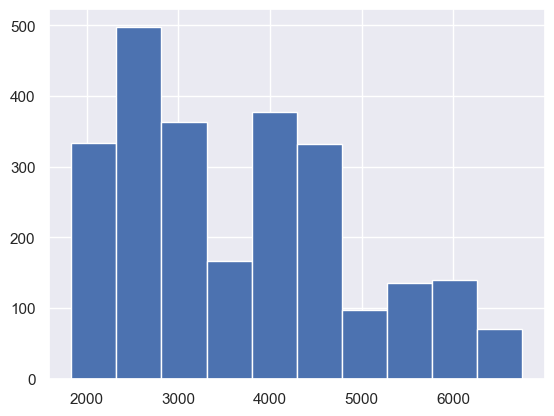

In [24]:
sns.set()

plt.hist(df['SP500'])
plt.show

In [41]:
close_current = df['SP500'].iloc[-1]
close_current

np.float64(6664.01)

In [42]:
close_mean = df['SP500'].mean()
close_mean

np.float64(3673.714103379722)

In [43]:
close_sd = df['SP500'].std()
close_sd

1238.7604628816448

In [44]:
sigma1 = close_mean + close_sd
sigma1

np.float64(4912.474566261367)

In [45]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

np.float64(6151.235029143012)

In [46]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

np.float64(6770.615260583834)

In [47]:
cols = ['Date','SP500']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2515 entries, 0 to 2514
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2515 non-null   datetime64[ns]
 1   SP500   2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 39.4 KB


In [48]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2015-10-19 to 2025-10-17')

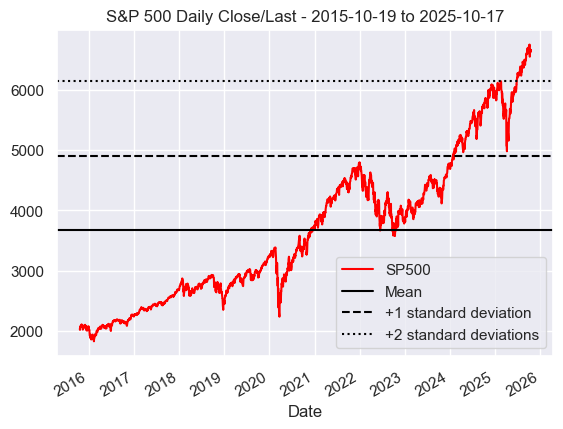

In [49]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='SP500', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2015-10-19 to 2025-10-17')

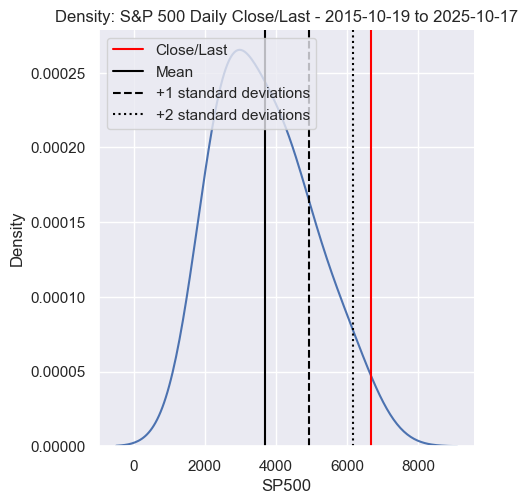

In [50]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['SP500'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_current, color=c, label='Close/Last')
plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [51]:
z_score = (close_current - close_mean)/close_sd
z_score

np.float64(2.4139419897727077)

In [52]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results